# Batch Denoising of Electron Microscopy (EM) Images

**Author:** Dmitry Chezganov (GitHub: [DexterChe](https://github.com/DexterChe))  
**Date Created:** 25/10/2024 

## Overview
This Jupyter Notebook provides a script for batch denoising of electron microscopy (EM) images, enhancing image quality by reducing noise while preserving essential details. This process is particularly useful for image analysis in materials science and microscopy, where image clarity is critical for accurate data extraction and interpretation.

## Key Features
- **Automated Denoising:** The script applies pre-trained neural network-based (NN) denoising methods to batches of images, making it efficient for processing large datasets.The NN was develoed by Ivan Lobato and can be found at [https://github.com/Ivanlh20/tk_r_em](https://github.com/Ivanlh20/tk_r_em) as well as the details of installation procedure.
- **Customizable Directory Structure:** Allows users to specify output directories for different file formats (32-bit TIFF, 16-bit TIFF, PNG) for both denoised and original images, along with FFT (Fast Fourier Transform) comparison outputs.
- **User-Interactive Directory Selection:** Utilizes a GUI to facilitate directory selection for easy setup.
- **Comparison Output:** Generates side-by-side comparisons of denoised and original images, including FFT outputs, to assess the effectiveness of the denoising process.

## Prerequisites
- This notebook relies on an external module, `NN_denois_functions`, which should include the necessary denoising functions.
- Essential libraries include `tqdm` for progress tracking and `gc` for memory management, ensuring efficient performance for large data processing tasks.

## Usage
To use this notebook:
1. Place your EM image dataset in the specified input directory.
2. Run the cells to initiate batch processing, set the output directories, and generate denoised images.
3. Output files are saved in user-specified folders for easy retrieval and further analysis.

## Notes:
Current implementation of the scripts is created for use on Appple Mac with M chips but the adaptation for Windows platform with Nvidia CUDA is straightforward.

In [1]:
import NN_denois_functions as nn
from tqdm.notebook import tqdm, trange
import gc
import sys
import os

2024-10-25 12:05:17.586565: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Indicate the path to the data and paths to save the results
Note: You will be prompted to indicate a base folder to save results where all additional subfolders will be created

In [ ]:
# ! Specify the denoising directory
# denoise_dir = '/image_examples/'
denoise_dir = '/image_examples/'

# indicate m as NN denoised
m = 'NN_denoised'

# * Output folders
# ! Get directory from user - ask user with window to indicat the folder
# TODO: make the folder selection window open in the samefolder as denoise_dir
# script_dir = nn.os.path.dirname(nn.os.path.abspath(__file__))
script_dir = os.getcwd()

root = nn.tk.Tk()
root.withdraw() # hide tkinter window
directory_path = nn.askdirectory(initialdir=denoise_dir, title='Select common folder for all output subfolders like Report/2023-03/E5005/HAADF/')
print(f'Folder structure will be written to {directory_path}')
if not directory_path: # if user cancels directory selection, exit script
    print('Common output directory selection cancelled. Exiting script.')
# * Denoised files
# Output folder for denoised 32-bit tiff files
outputpath_denoised_tif32bit = nn.make_folder(directory_path, '/' + m + '/tiff32bit')
print(f'Folder for denoised 32-bit tiff files: {outputpath_denoised_tif32bit}')
# Output folder for denoised 16-bit tiff files
outputpath_denoised_tif16bit = nn.make_folder(directory_path, '/' + m + '/tiff16bit')
print(f'Folder for denoised 16-bit tiff files: {outputpath_denoised_tif16bit}')
# Output folder for denoised png files
outputpath__denoised_png = nn.make_folder(directory_path, '/' + m + '/png')
print(f'Folder for denoised png files: {outputpath__denoised_png}')
# * Original files
# Output folder for original 32-bit tiff files
outputpath_original_tif32bit = nn.make_folder(directory_path, '/' + 'original/tiff32bit')
print(f'Folder for original 32-bit tiff files: {outputpath_original_tif32bit}')
# Output folder for original 16-bit tiff files
outputpath_original_tif16bit = nn.make_folder(directory_path, '/' + 'original/tiff16bit')
print(f'Folder for original 16-bit tiff files: {outputpath_original_tif16bit}')
# Output folder for original png files
outputpath_original_png = nn.make_folder(directory_path, '/' + 'original/png')
print(f'Folder for original png files: {outputpath_original_png}')
# * Comparison denoised and original files
# Output for comparison of denoised and original tiff files
outputpath_comparison_tif = nn.make_folder(directory_path, '/' + 'comparison_denoised_vs_original/')
print(f'Folder for comparison tiff files: {outputpath_comparison_tif}')
# * FFT folder
# Output folder for FFT tiff files
# outputpath_fft_tif = make_folder(directory_path, '/' + 'fft/tiff')
# print(f'Folder for FFT tiff files: {outputpath_fft_tif}')
# Output folder for FFT png files
outputpath_fft_png = nn.make_folder(directory_path, '/' + 'fft/')
print(f'Folder for FFT png files: {outputpath_fft_png}')

# Outout folder for FFT cut png
outputpath_fft_cut_png = nn.make_folder(directory_path, '/' + 'fft_cut/')
print(f'Folder for FFT cut png files: {outputpath_fft_cut_png}')
# Output folder for FFT to compare denoised and original tiff files
outputpath_fft_comparison_tif = nn.make_folder(directory_path, '/' + 'fft_comparison_denoised_vs_original/')
print(f'Folder for FFT comparison tiff files: {outputpath_fft_comparison_tif}')

## Use patch-based method if x or y dimension is larger than max_size_gpu

In [3]:
# max_size_gpu = 512
max_size_gpu = 2048
print(f'Maximum image size which fits into GPU memory: {max_size_gpu}')

# ! Set GPU ID
nn.fcn_set_gpu_id("0")

Maximum image size which fits into GPU memory: 2048


## Get paths of all files in the directory

In [4]:
# * Get list of files to denoise
file_format = '*.emi'
# file_format = '*.hspy' #! check right format before use
files = nn.glob.glob(denoise_dir + file_format)
# Number of files to denoise
N = len(files)
print(f'Number of files to denoise: {N}')

Number of files to denoise: 3


## Run denoising and saving in various formats
Please specify what model to expect to apply to make image denoising

Model: sfr_lrstem
Loading network...
Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2024-10-25 12:05:27.127212: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-25 12:05:27.127266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: sfr_hrstem
Loading network...
Network loaded.
Denoising images...


  0%|          | 0/3 [00:00<?, ?it/s]

Image 1/3
Image name: 17.08.29 Scanning Acquire
File is not a TIFF image. It is .emi file. Using the hyperspy to load the data...
ndim > 2. Using the first image from the stack...
Image size: 2048 x 2048
Mag 1300.0 ---> High-resolution model is used.


2024-10-25 12:05:42.806740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


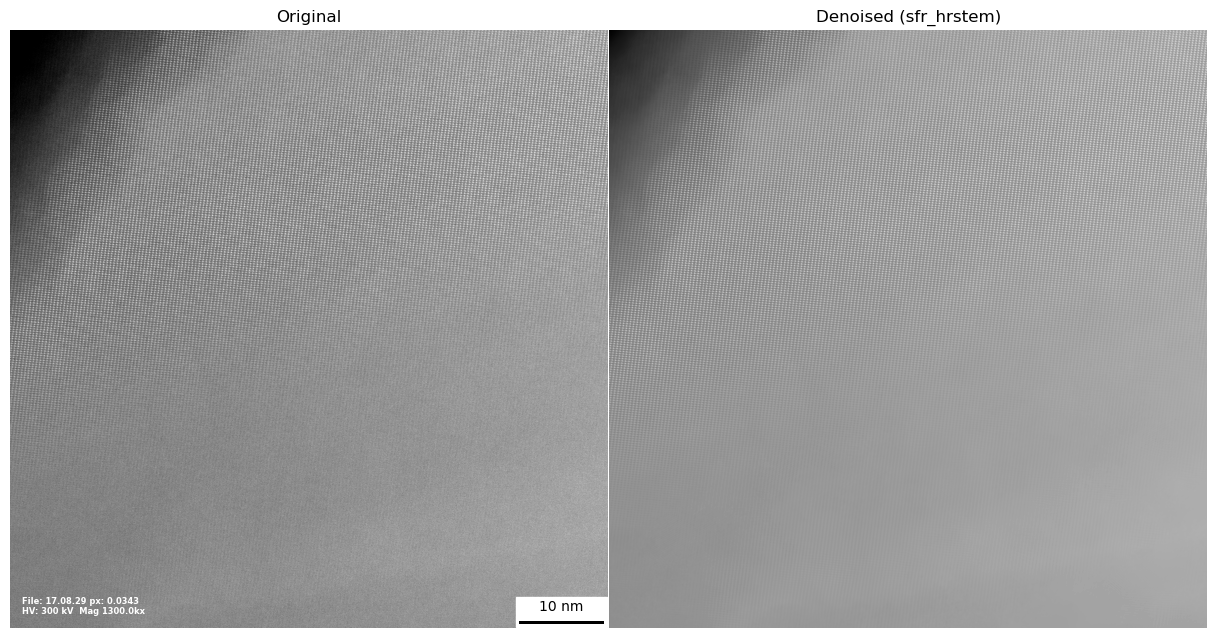

Saved as tiff:  17.08.29 Scanning Acquire_denoised
Saved as png:  17.08.29 Scanning Acquire_denoised
Saved as tiff:  17.08.29 Scanning Acquire_original
Saved as png:  17.08.29 Scanning Acquire_original
#####################
Image 2/3
Image name: Scanning Search
File is a list of images. Processing each image separately.
Image name: Scanning Search_0
File is not a TIFF image. It is .emi file. Using the hyperspy to load the data...
ndim > 2. Using the first image from the stack...
Image size: 1024 x 1024
Mag 20.0 ---> Low-resolution model is used.


2024-10-25 12:06:18.571129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


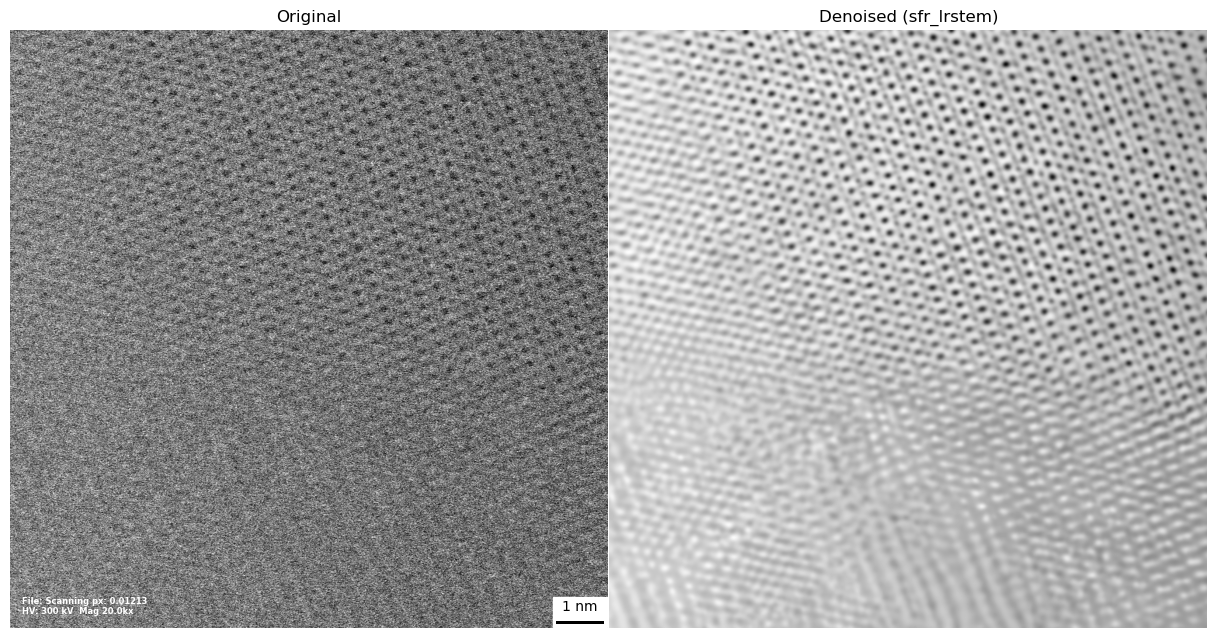

Saved as tiff:  Scanning Search_0_denoised
Saved as png:  Scanning Search_0_denoised
Saved as tiff:  Scanning Search_0_original
Saved as png:  Scanning Search_0_original
Image name: Scanning Search_0_1
File is not a TIFF image. It is .emi file. Using the hyperspy to load the data...
ndim > 2. Using the first image from the stack...
Image size: 307 x 307
Mag 20.0 ---> Low-resolution model is used.


2024-10-25 12:06:36.628144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


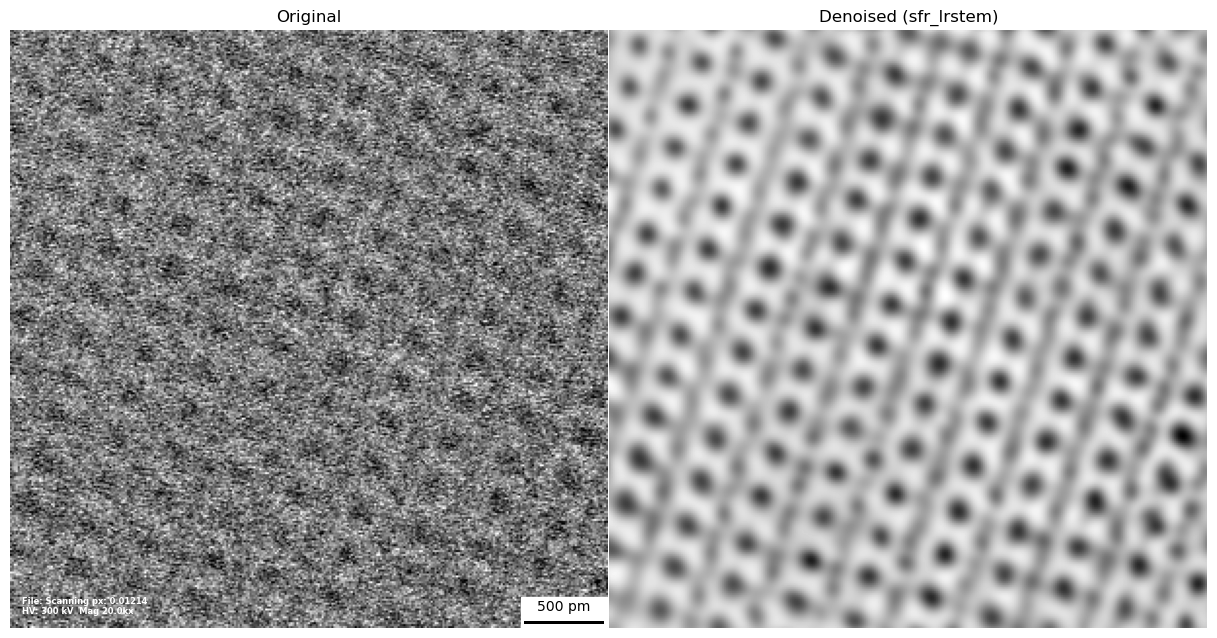

Saved as tiff:  Scanning Search_0_1_denoised
Saved as png:  Scanning Search_0_1_denoised
Saved as tiff:  Scanning Search_0_1_original
Saved as png:  Scanning Search_0_1_original
#####################
Image 3/3
Image name: 16.33.50 Scanning Acquire
File is not a TIFF image. It is .emi file. Using the hyperspy to load the data...
ndim > 2. Using the first image from the stack...
Image size: 2048 x 2048
Mag 7200.0 ---> High-resolution model is used.


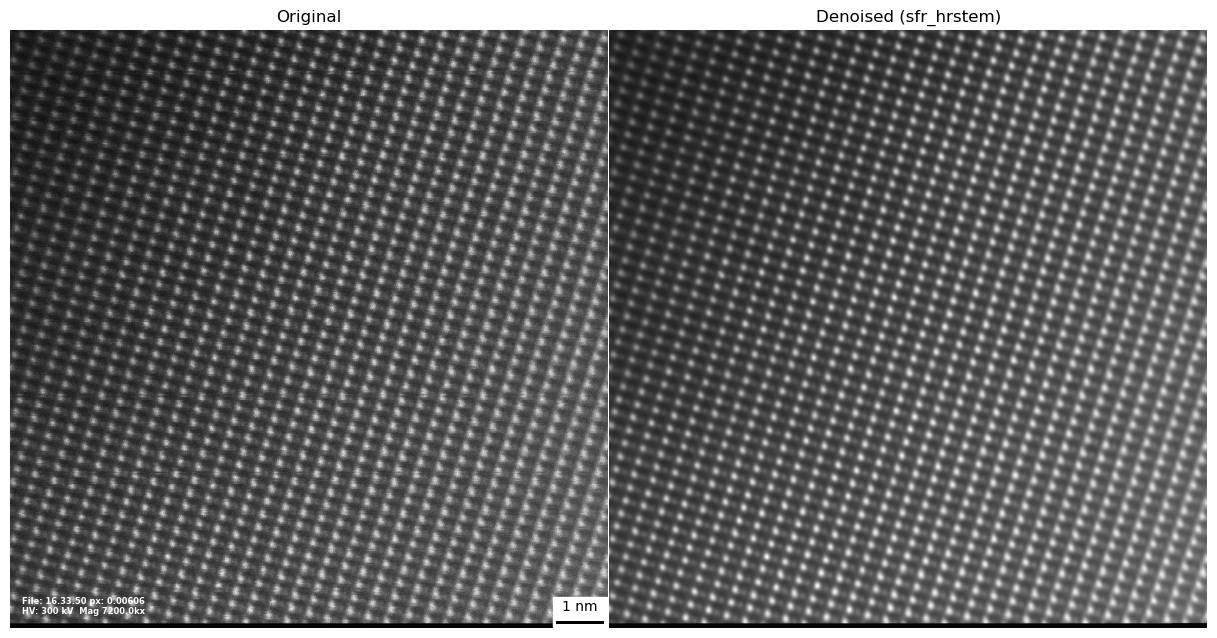

Saved as tiff:  16.33.50 Scanning Acquire_denoised
Saved as png:  16.33.50 Scanning Acquire_denoised
Saved as tiff:  16.33.50 Scanning Acquire_original
Saved as png:  16.33.50 Scanning Acquire_original
#####################
Denoising is finished!


In [5]:
# * Choose the model
# ! For example: you lowmag and hrmag images, then you need to load two models
# valid_models = ['sfr_hrstem', 'sfr_lrstem', 'sfr_hrsem', 'sfr_lrsem', 'sfr_hrtem', 'sfr_lrtem']
# ! Indicate all models expected to use
net_name_1 = 'sfr_lrstem'
net_name_2 = 'sfr_hrstem'
# net_name_1 = 'sfr_lrtem'
# net_name_2 = 'sfr_hrtem'
net_names = [net_name_1, net_name_2]
# add file counter thta is used in the loop to indicate file number progress
counter = 1
r_em_nn_net_dict = {}
# * Load the network
for net_name in net_names:
    print(f'Model: {net_name}')
    print('Loading network...')
    r_em_nn = nn.load_network(net_name)
    # make dictionary with model name and model
    r_em_nn_net_dict[net_name] = r_em_nn
    # r_em_nn_net_dict = {net_name: r_em_nn}

print('Network loaded.')
print('Denoising images...')

for file in tqdm(files):
    print(f'Image {counter}/{N}')
    filename = nn.os.path.basename(file)
    # if ends with .emi
    if filename.endswith('.emi'):
        filename = filename[:-4]
    # if ends with .hspy
    if filename.endswith('.hspy'):
        filename = filename[:-5]
    print(f'Image name: {filename}')
    # ! check if the file was processed before and already in outputpath__denoised_png folder
    if nn.os.path.isfile(outputpath__denoised_png + filename + '_denoised.png'):
        print(f'File {filename} was already processed. Skipping...')
        counter += 1
        continue
    # ? Check if the file is a list of images
    check_file = nn.hs.load(file)
    if isinstance(check_file, list):
        print('File is a list of images. Processing each image separately.')
        for idx in range(len(check_file)):
            filename = filename + '_' + str(idx)
            print(f'Image name: {filename}')
                # * Read the image
            img, img_adj, px_size, mag, HT, unit, scale, image_mode = nn.check_and_load_image(file_path=file, file_data_0=check_file[0], file_data=check_file[idx])
            # Check image size
            nx, ny = img.shape
            print(f'Image size: {nx} x {ny}')
            # Expand dimensions
            image = nn.np.expand_dims(img, axis=(0, -1)) # this is used for denoising
            # * Denoising the images
            # ? Define right magnification looking at the image before use
            if image_mode == 'image':
                if mag > 160.0:
                    net_name = net_name_2
                    print(f'Mag {mag} ---> High-resolution model is used.')
                else:
                    net_name = net_name_1
                    print(f'Mag {mag} ---> Low-resolution model is used.')
            else:
                net_name = net_name_1
                print(f'Image mode is not image ---> Low-resolution model is used.')
            
            denoised_image = nn.denoise_image(image,
                                                net = r_em_nn_net_dict[net_name], 
                                                nx=nx, 
                                                ny=ny, 
                                                max_size_gpu = max_size_gpu
                                                )
            # * Plot comparison of denoised and original image
            nn.plot_original_vs_denoised(original_image=img_adj,
                                            denoised_image=denoised_image,
                                            net_name=net_name,
                                            file_name=filename,
                                            cmap='gray',
                                            save_path=outputpath_comparison_tif,
                                            show=True,
                                            scale=scale,
                                            units=unit,
                                            px_size=px_size,
                                            HT=HT,
                                            mag=mag
                                            )
            # ! Check options for image saving
            # * Flags
            save_32bit_tif = True
            save_16bit_tif_png_scalerbar_original = True
            save_16bit_tif_png_scalerbar_denoised = True
            save_fft = True

            # * Make fft comparison
            nn.apply_fft_and_plot(file_name=filename,
                                    image=img_adj,
                                    scale=scale,
                                    denoised_image=denoised_image,
                                    net_name=net_name,
                                    save_path_png=outputpath_fft_png,
                                    save_path_fft_comparison=outputpath_fft_comparison_tif,
                                    show=False,
                                    save_fft=True,
                                    save_fft_comparison=True,
                                    )
            # * Make fft cut comparison
            nn.plot_image_fft_fft_cut(image=img_adj,
                                        file_name=filename,
                                        units=unit,
                                        cut_freq=8.0,
                                        scale=scale,
                                        HT=HT,
                                        mag=mag,
                                        px_size=px_size, #! new
                                        apodization=False,
                                        cmap='viridis',
                                        show=False,
                                        save=True,
                                        save_path=outputpath_fft_cut_png
                                        )

            # * Save denoised image
            # save denoised images as 32 tif
            if save_32bit_tif==True:
                nn.save_tif_32bit_image_denoised(image=denoised_image,
                                                    file_name=filename, 
                                                    outputpath=outputpath_denoised_tif32bit, 
                                                    pixelsize=px_size,
                                                    unit=unit,
                                                    model_name=net_name
                                                    )
                # save original images as 32 tif
                nn.save_tif_32bit_image_original(image=img_adj,
                                                    file_name=filename, 
                                                    outputpath=outputpath_original_tif32bit, 
                                                    pixelsize=px_size,
                                                    unit=unit,
                                                    model_name=net_name
                                                    )
            if save_16bit_tif_png_scalerbar_denoised==True:
            # save denoised images as 16bit tif and 8bit png with scalebar
                nn.save_tif_png_16bit_image_with_scalebar(image=denoised_image,
                                                        save_path_tif16bit=outputpath_denoised_tif16bit,
                                                        save_path_png=outputpath__denoised_png,
                                                        file_name=filename+'_denoised',
                                                        px_size=px_size,
                                                        mag=mag,
                                                        HT=HT,
                                                        units=unit,
                                                        show=False
                                                        )
            if save_16bit_tif_png_scalerbar_original==True:
            # save original images as 16bit tif and 8bit png with scalebar
                nn.save_tif_png_16bit_image_with_scalebar(image=img_adj,
                                                        save_path_tif16bit=outputpath_original_tif16bit,
                                                        save_path_png=outputpath_original_png,
                                                        file_name=filename+'_original',
                                                        px_size=px_size,
                                                        mag=mag,
                                                        HT=HT,
                                                        units=unit,
                                                        show=False
                                                        )

    else: 
        # * Read the image
        img, img_adj, px_size, mag, HT, unit, scale, image_mode = nn.check_and_load_image(file_path=file, file_data_0=check_file, file_data=check_file, how_to_process='hyperspy')
        # Check image size
        nx, ny = img.shape
        print(f'Image size: {nx} x {ny}')
        # Expand dimensions
        image = nn.np.expand_dims(img, axis=(0, -1)) # this is used for denoising
        # * Denoising the images
        # ? Define right magnification looking at the image before use
        if image_mode == 'image':
            if mag > 160.0:
                net_name = net_name_2
                print(f'Mag {mag} ---> High-resolution model is used.')
            else:
                net_name = net_name_1
                print(f'Mag {mag} ---> Low-resolution model is used.')
        else:
            net_name = net_name_1
            print(f'Image mode is not image ---> Low-resolution model is used.')
        
        denoised_image = nn.denoise_image(image,
                                            net = r_em_nn_net_dict[net_name], 
                                            nx=nx, 
                                            ny=ny, 
                                            max_size_gpu = max_size_gpu
                                            )
        # * Plot comparison of denoised and original image
        nn.plot_original_vs_denoised(original_image=img_adj,
                                        denoised_image=denoised_image,
                                        net_name=net_name,
                                        file_name=filename,
                                        cmap='gray',
                                        save_path=outputpath_comparison_tif,
                                        show=True,
                                        scale=scale,
                                        units=unit,
                                        px_size=px_size,
                                        HT=HT,
                                        mag=mag
                                        )
        # ! Check options for image saving
        # * Flags
        save_32bit_tif = True
        save_16bit_tif_png_scalerbar_original = True
        save_16bit_tif_png_scalerbar_denoised = True
        save_fft = True

        # * Make fft comparison
        nn.apply_fft_and_plot(file_name=filename,
                                image=img_adj,
                                scale=scale,
                                denoised_image=denoised_image,
                                net_name=net_name,
                                save_path_png=outputpath_fft_png,
                                save_path_fft_comparison=outputpath_fft_comparison_tif,
                                show=False,
                                save_fft=True,
                                save_fft_comparison=True,
                                )
        # * Make fft cut comparison
        nn.plot_image_fft_fft_cut(image=img_adj,
                                    file_name=filename,
                                    units=unit,
                                    cut_freq=8.0,
                                    scale=scale,
                                    HT=HT,
                                    mag=mag,
                                    px_size=px_size, #! new
                                    apodization=False,
                                    cmap='viridis',
                                    show=False,
                                    save=True,
                                    save_path=outputpath_fft_cut_png
                                    )

        # * Save denoised image
        # save denoised images as 32 tif
        if save_32bit_tif==True:
            nn.save_tif_32bit_image_denoised(image=denoised_image,
                                                    file_name=filename, 
                                                    outputpath=outputpath_denoised_tif32bit, 
                                                    pixelsize=px_size,
                                                    unit=unit,
                                                    model_name=net_name
                                                )
            # save original images as 32 tif
            nn.save_tif_32bit_image_original(image=img_adj,
                                                file_name=filename, 
                                                outputpath=outputpath_original_tif32bit, 
                                                pixelsize=px_size,
                                                unit=unit,
                                                model_name=net_name
                                                )
        if save_16bit_tif_png_scalerbar_denoised==True:
        # save denoised images as 16bit tif and 8bit png with scalebar
            nn.save_tif_png_16bit_image_with_scalebar(image=denoised_image,
                                                    save_path_tif16bit=outputpath_denoised_tif16bit,
                                                    save_path_png=outputpath__denoised_png,
                                                    file_name=filename+'_denoised',
                                                    px_size=px_size,
                                                    mag=mag,
                                                    HT=HT,
                                                    units=unit,
                                                    show=False
                                                    )
        if save_16bit_tif_png_scalerbar_original==True:
        # save original images as 16bit tif and 8bit png with scalebar
            nn.save_tif_png_16bit_image_with_scalebar(image=img_adj,
                                                    save_path_tif16bit=outputpath_original_tif16bit,
                                                    save_path_png=outputpath_original_png,
                                                    file_name=filename+'_original',
                                                    px_size=px_size,
                                                    mag=mag,
                                                    HT=HT,
                                                    units=unit,
                                                    show=False
                                                    )
    gc.collect()
    # add counter
    counter += 1    
    print('#####################')

print('Denoising is finished!')


